## Import important Libraries

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn
import theano.tensor as tt
import warnings
from IPython.core.pylabtools import figsize
import seaborn as sns
from sklearn.metrics import (roc_curve, roc_auc_score, confusion_matrix, accuracy_score, f1_score, 
                             precision_recall_curve) 
from sklearn.metrics import confusion_matrix


import seaborn as sb
import matplotlib.pyplot as plt    
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)
%matplotlib inline
%matplotlib inline
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Load Data

In [2]:
df=pd.read_csv('audit_risk.csv')
df.sample(5)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
653,55.57,5,0.57,0.2,0.114,1.26,0.4,0.504,1.83,5.0,...,0.4,0,0.2,0.0,2.6,2.038,0.4,0.5,0.4076,0
517,21.61,16,0.37,0.2,0.074,0.10,0.2,0.020,0.47,5.0,...,0.4,0,0.2,0.0,2.0,1.494,0.4,0.5,0.2988,0
681,55.57,9,0.92,0.2,0.184,0.00,0.2,0.000,0.92,5.0,...,0.4,0,0.2,0.0,2.0,1.584,0.4,0.5,0.3168,0
534,21.61,16,0.27,0.2,0.054,0.35,0.2,0.070,0.62,5.0,...,0.4,0,0.2,0.0,2.0,1.524,0.4,0.5,0.3048,0
262,2.72,22,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,...,0.4,0,0.2,0.0,2.4,19.910,0.4,0.5,3.9820,1


## Basic Analysis

In [5]:
#first performing basic analysis
def basicanalysis(df):
    print("Shape is:\n", df.shape, ":\n")
    print("Columns are:\n", df.columns, ":\n")
    print("Types are:\n", df.info(), ":\n")
    print("Skewness of columns:\n", df.skew(), ":\n")
   # print("Statistical Analysis of Numerical Columns:\n", df.describe(), ":\n")
basicanalysis(df)

Shape is:
 (776, 27) :

Columns are:
 Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object') :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 no

### Changind history and dstrict Loss to float from integers

In [3]:
df['History'] = df['History'].astype(float)

In [4]:
df['District_Loss'] = df['District_Loss'].astype(float)

In [6]:
df.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


### Check Missing Values

In [7]:
df.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

## EDA

None


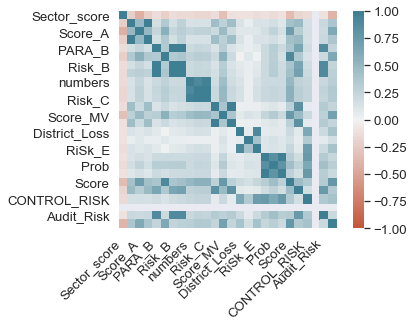

In [8]:
#numerical analysis
#histograms and boxplots for all numerical columns
#scatter plots (seaborn heatmaps)
def numcolanalysis(df):
    #correlation  matrix
    corr = df.corr()
    ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
    )

    ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
    
    );
    numcols = df.select_dtypes(include=np.number)
    

        
print (numcolanalysis(df))

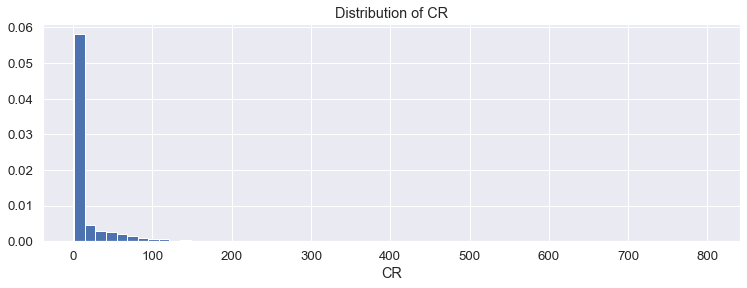

In [9]:
figsize(12.5, 4)
plt.hist(df['Inherent_Risk'], bins=60, density=True, label='Temperature')
plt.xlabel('CR')
plt.title('Distribution of CR')
plt.show()

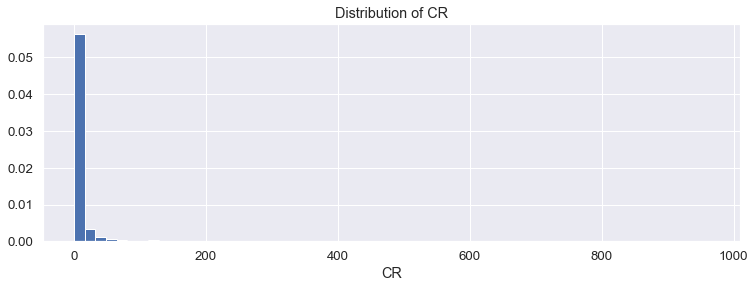

In [10]:
figsize(12.5, 4)
plt.hist(df['Audit_Risk'], bins=60, density=True, label='Temperature')
plt.xlabel('CR')
plt.title('Distribution of CR')
plt.show()

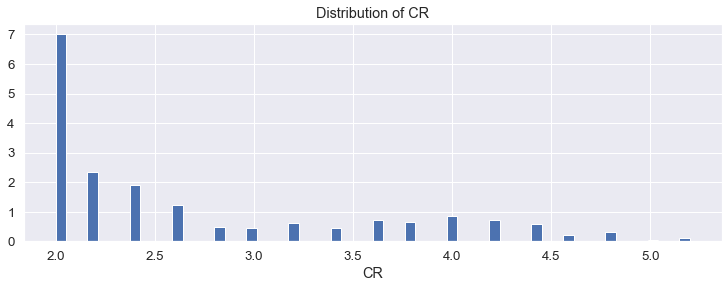

In [11]:
figsize(12.5, 4)
plt.hist(df['Score'], bins=60, density=True, label='Temperature')
plt.xlabel('CR')
plt.title('Distribution of CR')
plt.show()

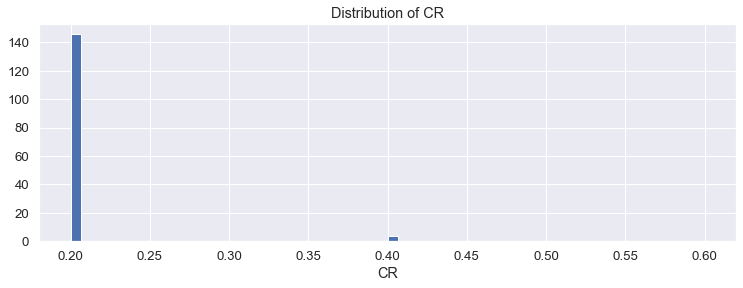

In [31]:
figsize(12.5, 4)
plt.hist(df['PROB'], bins=60, density=True, label='Temperature')
plt.xlabel('CR')
plt.title('Distribution of CR')
plt.show()

## Plot to check if linear relations exist between columns

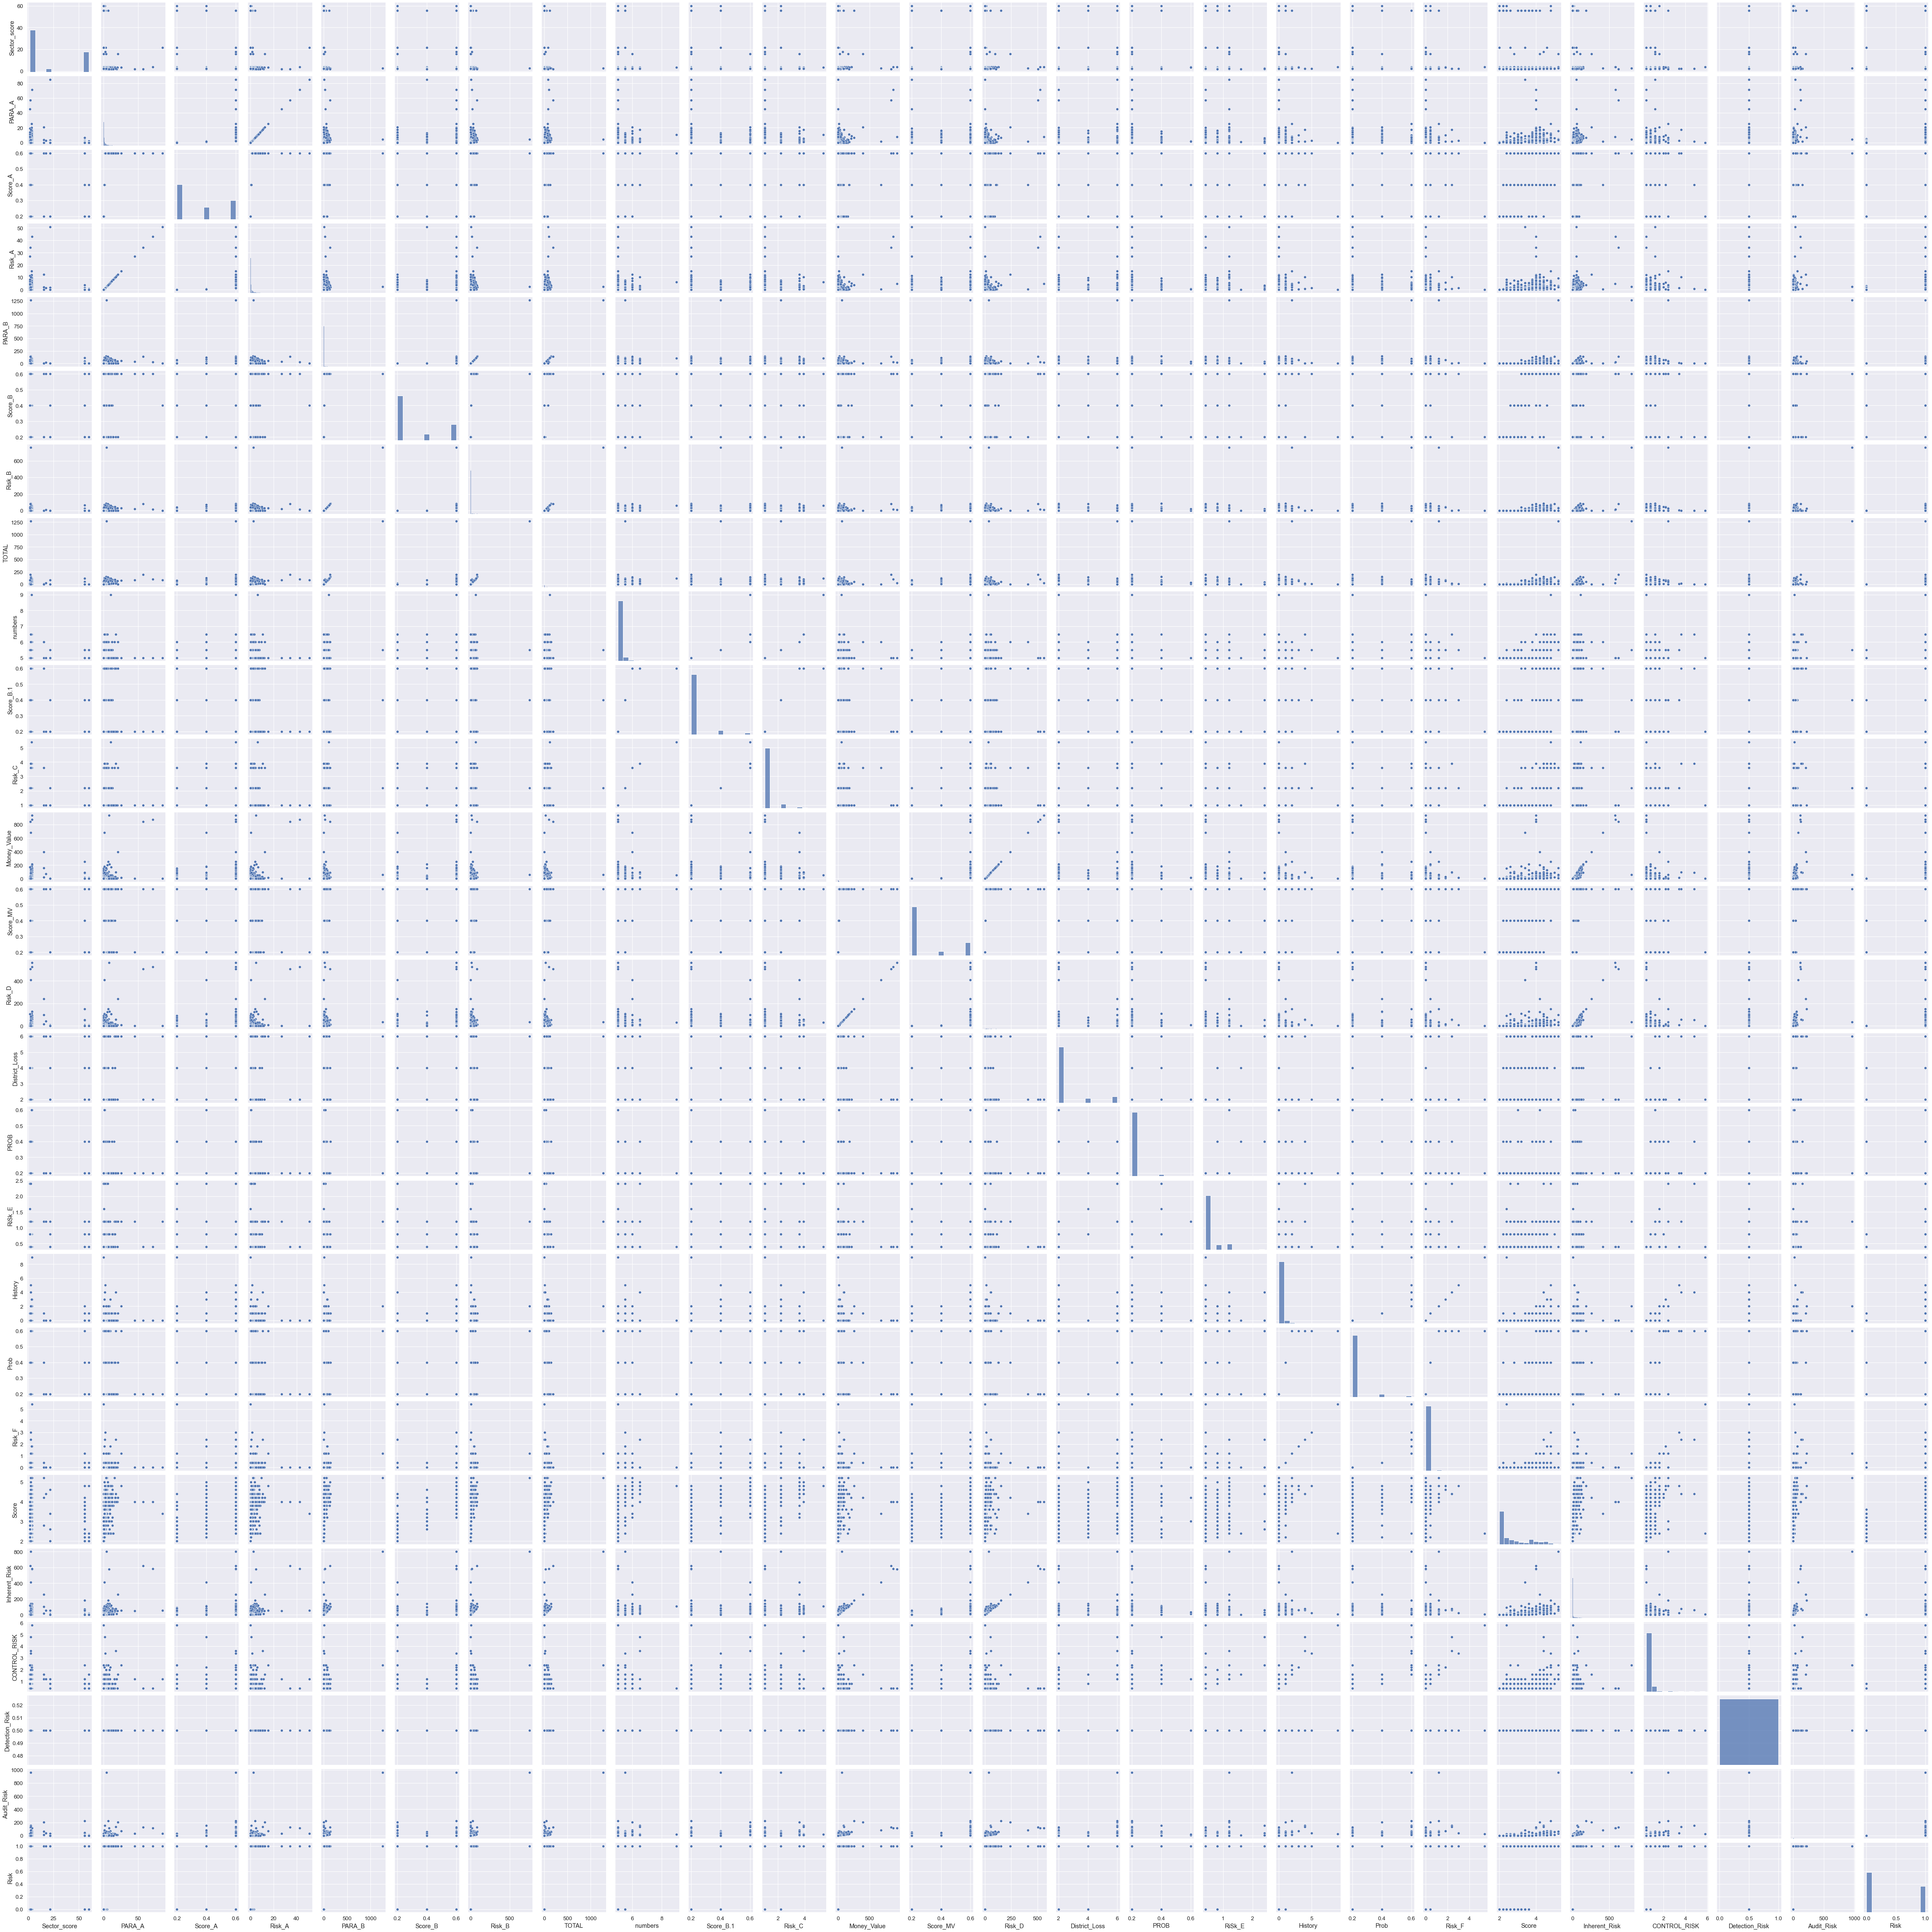

In [71]:
ax=seaborn.pairplot(df)

## OBSERVATION FROM ABOVE PLOT
#### History and Control Risk have linear relation with each other and seems to have an impact. Further more upon analysis and different plots, Score_MV seems to include combined results of almost 3 kinds of risk so it should be included instead of all risk columns.

### Selecting limited column with most impact to be included in MCMC

In [32]:
df2=df[['Score_MV','History','CONTROL_RISK','Risk']]

# PCA 
#### to check key attributes so that only key columns are selected since MCMC takes too long when number are columns are high

In [33]:
def XY_split(df2):
    #make a copy of the label column and store in y
    y = df2['Risk'].copy()
    
    #now delete the original
    X = df2.drop('Risk',axis=1)
    return X, y
#print (XY_split(df2))

In [35]:
def PCAnalysis(df2):
    X,y=XY_split(df2)
    
    X=StandardScaler().fit_transform(X)
    pca=PCA(n_components=2)
    pca_new=pca.fit_transform(X)
    return pca_new
PCAnalysis(df2)


array([[-0.5868385 ,  0.38413907],
       [-0.5868385 ,  0.38413907],
       [-0.5868385 ,  0.38413907],
       ...,
       [-0.5868385 ,  0.38413907],
       [-0.5868385 ,  0.38413907],
       [-0.5868385 ,  0.38413907]])

In [36]:
df2

,Score_MV,History,CONTROL_RISK,Risk
0,0.2,0.0,0.4,1
1,0.2,0.0,0.4,0
2,0.2,0.0,0.4,0
3,0.6,0.0,0.4,1
4,0.2,0.0,0.4,0
...,...,...,...,...
771,0.2,0.0,0.4,0
772,0.2,0.0,0.4,0
773,0.2,0.0,0.4,0
774,0.2,0.0,0.4,0


C:\Users\iuser\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


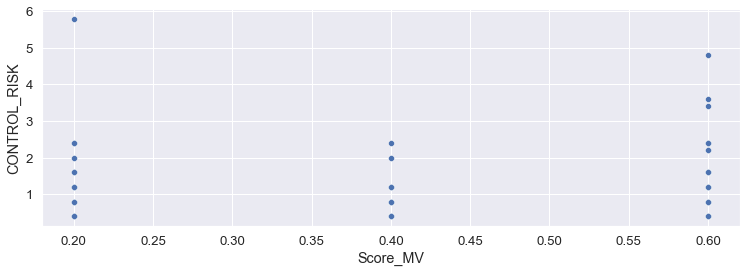

In [28]:
ax=sns.scatterplot(df['Score_MV'], df['CONTROL_RISK'])

### Linear Relation between the plots actually selected

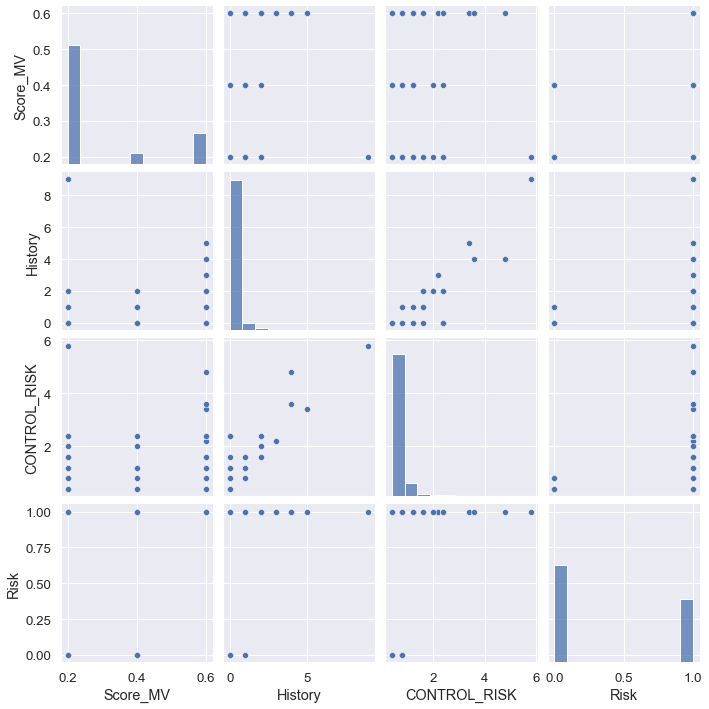

In [39]:
ax=seaborn.pairplot(df2)

### Correlation Matrix

<ipython-input-40-b00c07d0a3f7>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


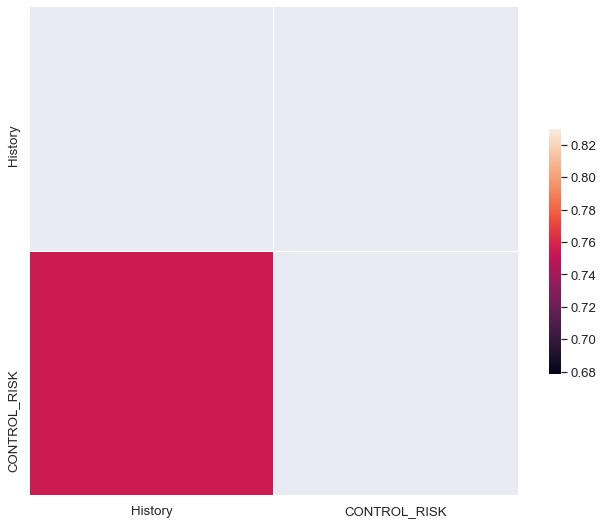

In [40]:
corr=df2.iloc[:, 1:-1].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
ax=sns.heatmap(corr, mask=mask,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# MCMC - Metropolis Hastings

## First-Model With 2500 samples
#### Took > 1 hour

In [41]:
lower=-10**6
higher=10**6
with pm.Model() as first_model:
    #priors on parameters
    beta_0=pm.Uniform('beta_0', lower=lower, upper= higher)
    beta_score=pm.Uniform('beta_score', lower, higher)
    beta_history=pm.Uniform('beta_history', lower, higher)

    beta_cr=pm.Uniform('beta_cr', lower, higher)

    
    #the probability of belonging to class 1
    p = pm.Deterministic('p', pm.math.sigmoid(beta_0+beta_score*df2['Score_MV']+
                               beta_history*df2['History']+
                               
                               beta_cr*df2['CONTROL_RISK']
                                           ))
with first_model:
    #fit the data 
    observed=pm.Bernoulli("risk", p, observed=df2['Risk'])
    start=pm.find_MAP()
    step=pm.Metropolis()
    
    #samples from posterior distribution 
    trace=pm.sample(2500, step=step, start=start)
    burned_trace=trace[1500:]

<ipython-input-41-315e91dd1d65>:25: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace=pm.sample(2500, step=step, start=start)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [beta_cr]
>Metropolis: [beta_history]
>Metropolis: [beta_score]
>Metropolis: [beta_0]


Sampling 4 chains for 1_000 tune and 2_500 draw iterations (4_000 + 10_000 draws total) took 3759 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


<ipython-input-42-f8ae0817c982>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(burned_trace)
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\iuser\miniconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


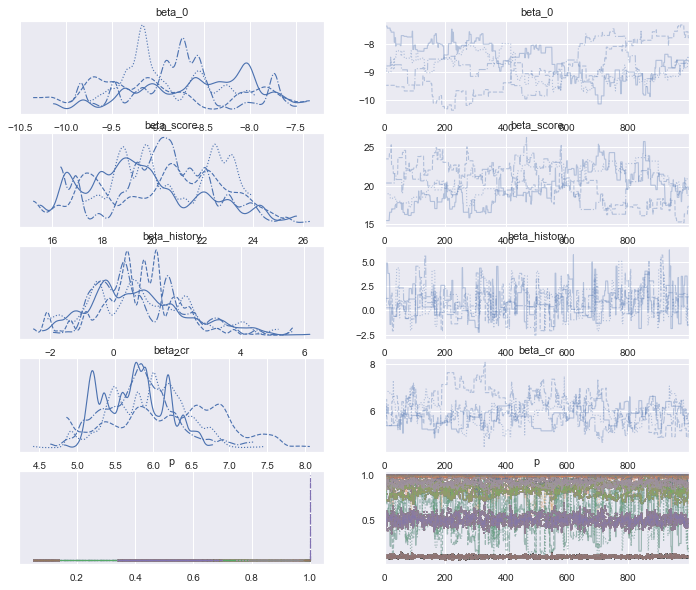

In [42]:
pm.traceplot(burned_trace)
plt.show()

In [43]:
coeffs=['beta_0', 'beta_cr', 'beta_history', 'beta_score']
d=dict()
for item in coeffs:
    d[item]=[burned_trace[item].mean()]
    
result_coeffs=pd.DataFrame.from_dict(d)    
result_coeffs
#coeff_result=pd.DataFrame(d)    
#coeff_result

,beta_0,beta_cr,beta_history,beta_score
0,-8.799883,5.935292,0.82455,20.236174


C:\Users\iuser\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


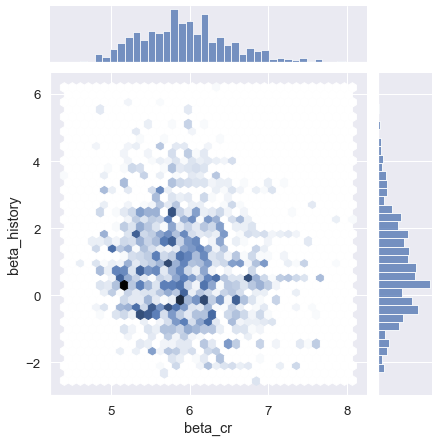

In [44]:
figsize(12.5, 12.5)
seaborn.jointplot(burned_trace['beta_cr'], burned_trace['beta_history'], kind="hex") #color="#4CB391")
plt.xlabel("beta_cr")
plt.ylabel("beta_history");

C:\Users\iuser\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


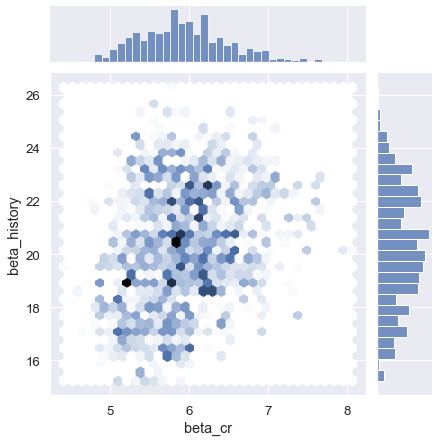

In [45]:
figsize(12.5, 12.5)
seaborn.jointplot(burned_trace['beta_cr'], burned_trace['beta_score'], kind="hex") #color="#4CB391")
plt.xlabel("beta_cr")
plt.ylabel("beta_history");

In [46]:
coeffs=['beta_0', 'beta_cr', 'beta_history', 'beta_score']
d=dict()
for item in coeffs:
    d[item]=[float(start[item])]
    
map_coeffs=pd.DataFrame.from_dict(d)    
map_coeffs

,beta_0,beta_cr,beta_history,beta_score
0,-8.799464,5.903472,0.38182,20.263168


### Fitting Logistic Regression to laer compare result of mcmc with log regression

In [48]:
from sklearn.linear_model import LogisticRegression
X=df2.iloc[:, 1: -1]
y=df2['Risk']
logit=LogisticRegression()
logit_model=logit.fit(X,y)
pd.DataFrame(logit_model.coef_, columns=X.columns)

,History,CONTROL_RISK
0,1.696264,3.863144


In [49]:
logit_prediction=logit_model.predict(X)

### Plot of predicting 1 and 0

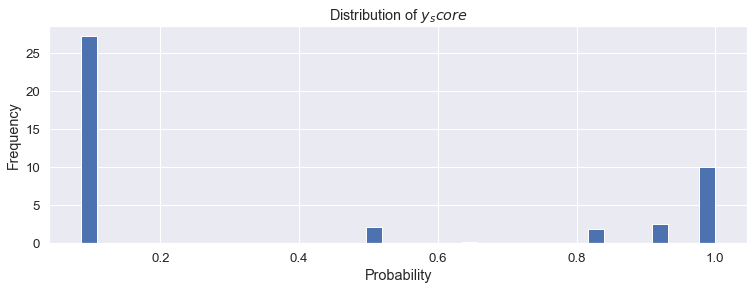

In [50]:
#compute the average probability of predicting 1. 
y_score = np.mean(burned_trace['p'], axis=0)
#histogram of the distribution
figsize(12.5,4)
plt.hist(y_score, bins=40, density=True)
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Distribution of $y_score$')
plt.show()

## Confuion Matrix and Accuracy and F1-Score of MCMC Model

In [51]:
first_model_prediction=[1 if x >0.5 else 0 for x in y_score]

In [72]:
first_model_confussion_matrix =confusion_matrix(df2['Risk'], first_model_prediction)
first_model_confussion_matrix


array([[464,   7],
       [ 56, 249]], dtype=int64)

In [55]:
import sklearn
from sklearn.metrics import classification_report
print(sklearn.metrics.classification_report(y, first_model_prediction))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       471
           1       0.97      0.82      0.89       305

    accuracy                           0.92       776
   macro avg       0.93      0.90      0.91       776
weighted avg       0.92      0.92      0.92       776



#####  Accuracy is 92%

In [73]:
pred_scores = dict(y_true=df2['Risk'],y_score=y_score)
roc_auc_score(**pred_scores)

0.9187254185374683

##### F1-Score is 91.8%

## Confuion Matrix and Accuracy and F1-Score of Logistic Regression

In [58]:
print(sklearn.metrics.classification_report(y, logit_prediction))


              precision    recall  f1-score   support

           0       0.74      0.94      0.83       471
           1       0.84      0.48      0.61       305

    accuracy                           0.76       776
   macro avg       0.79      0.71      0.72       776
weighted avg       0.78      0.76      0.74       776



## Second-Model With 6500 samples

### Took >2.5 hrs

In [59]:
lower=-10**6
higher=10**6
with pm.Model() as second_model:
    #priors on parameters
    beta_0=pm.Uniform('beta_0', lower=lower, upper= higher)
    beta_score=pm.Uniform('beta_score', lower, higher)
    beta_history=pm.Uniform('beta_history', lower, higher)

    beta_cr=pm.Uniform('beta_cr', lower, higher)

    
    #the probability of belonging to class 1
    p = pm.Deterministic('p', pm.math.sigmoid(beta_0+beta_score*df2['Score_MV']+
                               beta_history*df2['History']+
                               
                               beta_cr*df2['CONTROL_RISK']
                                           ))
with second_model:
    #fit the data 
    observed=pm.Bernoulli("risk", p, observed=df2['Risk'])
    start=pm.find_MAP()
    step=pm.Metropolis()
    
    #samples from posterior distribution 
    trace=pm.sample(6500, step=step, start=start)
    burned_trace=trace[3000:]

<ipython-input-59-c4696ed19e1b>:25: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace=pm.sample(6500, step=step, start=start)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [beta_cr]
>Metropolis: [beta_history]
>Metropolis: [beta_score]
>Metropolis: [beta_0]


Sampling 4 chains for 1_000 tune and 6_500 draw iterations (4_000 + 26_000 draws total) took 8741 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


<ipython-input-60-f8ae0817c982>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(burned_trace)
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\iuser\miniconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


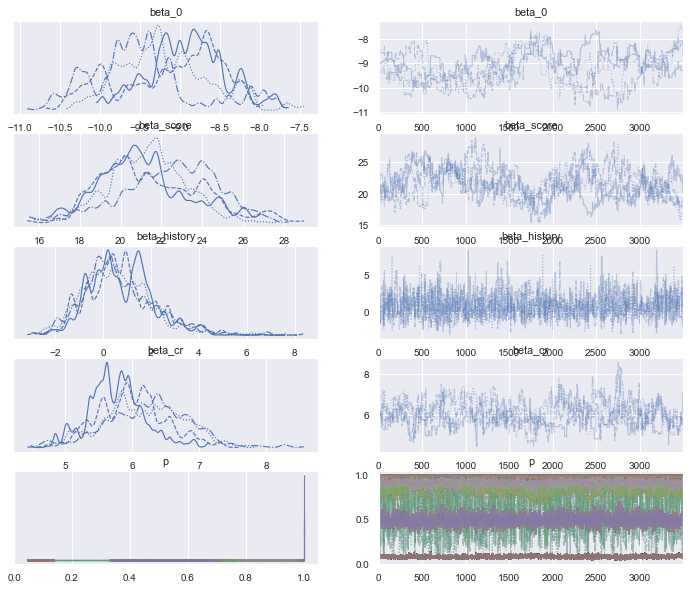

In [60]:
pm.traceplot(burned_trace)
plt.show()

In [61]:
coeffs=['beta_0', 'beta_cr', 'beta_history', 'beta_score']
d=dict()
for item in coeffs:
    d[item]=[burned_trace[item].mean()]
    
result_coeffs=pd.DataFrame.from_dict(d)    
result_coeffs
#coeff_result=pd.DataFrame(d)    
#coeff_result

,beta_0,beta_cr,beta_history,beta_score
0,-9.166736,6.047668,0.698728,21.589231


C:\Users\iuser\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


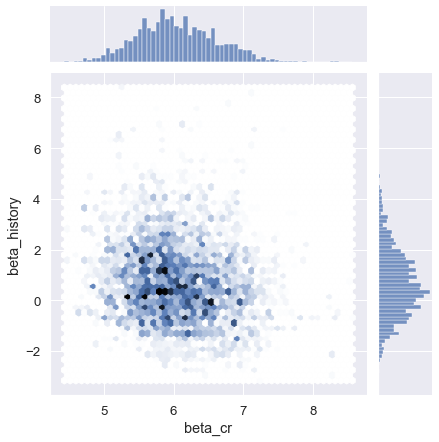

In [62]:
figsize(12.5, 12.5)
seaborn.jointplot(burned_trace['beta_cr'], burned_trace['beta_history'], kind="hex") #color="#4CB391")
plt.xlabel("beta_cr")
plt.ylabel("beta_history");

C:\Users\iuser\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


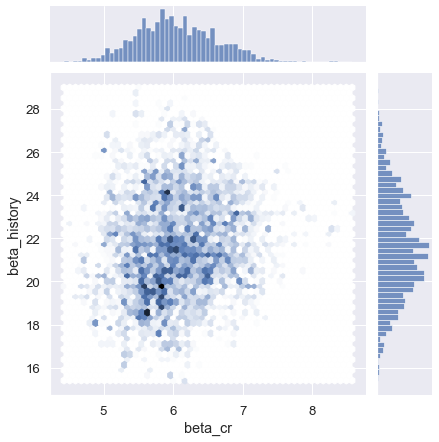

In [63]:
figsize(12.5, 12.5)
seaborn.jointplot(burned_trace['beta_cr'], burned_trace['beta_score'], kind="hex") #color="#4CB391")
plt.xlabel("beta_cr")
plt.ylabel("beta_history");

In [64]:
coeffs=['beta_0', 'beta_cr', 'beta_history', 'beta_score']
d=dict()
for item in coeffs:
    d[item]=[float(start[item])]
    
map_coeffs=pd.DataFrame.from_dict(d)    
map_coeffs

,beta_0,beta_cr,beta_history,beta_score
0,-8.799464,5.903472,0.38182,20.263168


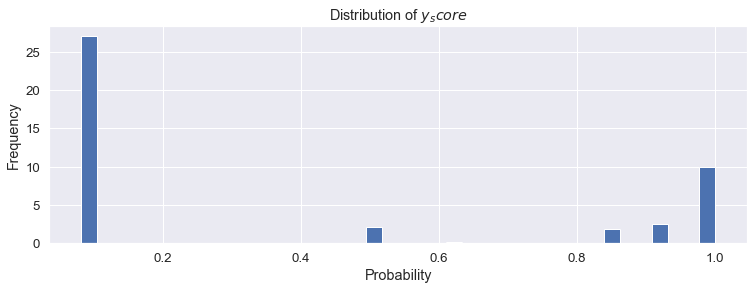

In [65]:
#compute the average probability of predicting 1. 
y_score = np.mean(burned_trace['p'], axis=0)
#histogram of the distribution
figsize(12.5,4)
plt.hist(y_score, bins=40, density=True)
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Distribution of $y_score$')
plt.show()

In [66]:
second_model_prediction=[1 if x >0.5 else 0 for x in y_score]

In [74]:
second_model_confussion_matrix =confusion_matrix(df2['Risk'], second_model_prediction)
second_model_confussion_matrix

array([[464,   7],
       [ 56, 249]], dtype=int64)

In [68]:
print(sklearn.metrics.classification_report(y, second_model_prediction))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       471
           1       0.97      0.82      0.89       305

    accuracy                           0.92       776
   macro avg       0.93      0.90      0.91       776
weighted avg       0.92      0.92      0.92       776



In [75]:
pred_scores = dict(y_true=df2['Risk'],y_score=y_score)
roc_auc_score(**pred_scores)

0.9187254185374683

In [76]:
print(sklearn.metrics.classification_report(y, first_model_prediction))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       471
           1       0.97      0.82      0.89       305

    accuracy                           0.92       776
   macro avg       0.93      0.90      0.91       776
weighted avg       0.92      0.92      0.92       776



# Conclusion and Analysis

##### MCMC Gives more accurate results in least amount of columns (i.e. only 4). Whereas if those 4 columns are applied to tranditional ML Algo for example logistic regression as shown above the Accuracy is merely 76% whereas MCMC give 92%.
##### Moreover the more of samples i increase, the more accurately MCMC is able to capture the true sample. But there is no significant difference in validation metric scores

##### According to me, MCMC has performed better. Eventhough it takes more time but the results are as accurate with less parameter. For Traditional ML results, Refer to 'Audit_Risk - ML.ipynb' file